In [1]:
from pathlib import Path
from smokingml.datasets.nursing_dataset_v1 import nursing_dataset_v1, nursingv1_train_dev_test_split, utils, WINSIZE
from smokingml.modules import evaluate_loop, train_loop, inner_evaluate_loop, inner_train_loop, optimization_loop
from smokingml.models import mlp_1hl, FCN, CNNModel
from torch.utils.data import DataLoader
from torch import nn
import torch
import matplotlib.pyplot as plt
from smokingml.utils import plot_and_save_cm
from tqdm import tqdm

In [2]:
nursingv1_dir = Path('../data/nursingv1_dataset')
session_ids = utils.get_all_session_ids(nursingv1_dir)[:10]
train_dataset, dev_dataset, _ = nursingv1_train_dev_test_split(
    nursingv1_dir,
    train_size=1-0.5,
    dev_size=0.5,
    test_size=0.0,
    shuffle=True,
    session_ids=session_ids
)
trainloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
devloader = DataLoader(dev_dataset, batch_size=64, shuffle=True)

In [3]:
device = 'cpu'
model = FCN(in_channels=3, winsize=WINSIZE).to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

In [ ]:
lossi = []
for i in tqdm(range(10)):
    lossi += inner_train_loop(model, trainloader, criterion, optimizer, device)
plt.plot(lossi)

In [4]:
train_loop(model, trainloader, criterion, optimizer, epochs=20, device=device)

Starting train_loop


Epoch 19: Train Loss: 0.012022: 100%|██████████| 20/20 [30:25<00:00, 91.27s/it]

Finished train_loop. Elapsed time: 1825.373


In [7]:
y_true, y_pred, loss = evaluate_loop(model, criterion, trainloader, device)
plot_and_save_cm(y_true, y_pred, 'cm.jpg')
loss

Starting evaluate_loop
Finished evaluate_loop. Elapsed time: 13.978


0.030307602547060036

In [5]:
y_true, y_pred, loss = evaluate_loop(model, criterion, devloader, device)
plot_and_save_cm(y_true, y_pred, 'cm.jpg')
loss

Starting evaluate_loop
Finished evaluate_loop. Elapsed time: 15.157


0.704579346489733

In [ ]:
dev_dataset.session_ids

In [14]:
session = dev_dataset.load_one_windowed_session(60)

one_guyloader = DataLoader(session, batch_size=64)

y_true, y_pred, loss = evaluate_loop(model, criterion, one_guyloader, device)
plot_and_save_cm(y_true.flatten(), y_pred.flatten(), 'cm.jpg')

Starting evaluate_loop
Finished evaluate_loop. Elapsed time: 2.799


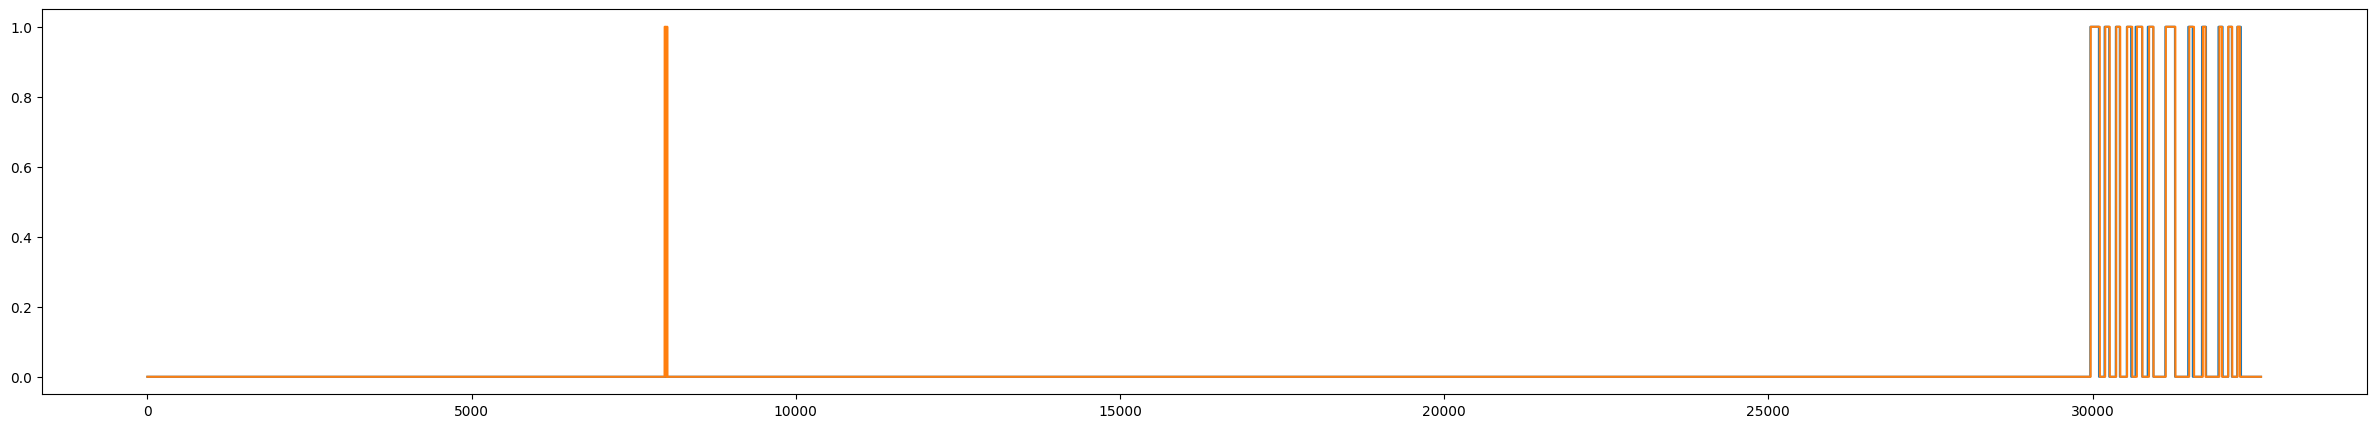

In [16]:
plt.figure(figsize=(30,5))
plt.plot(y_true)
plt.plot(y_pred)
plt.savefig('out.pdf')